In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Defining the relative paths to the dataset directories
test_dir = 'D:/Humber/Winter 23/Deep Learning/Project/ProjectDatasetImage/ProjectDatasetImage/Test/'
train_dir = 'D:/Humber/Winter 23/Deep Learning/Project/ProjectDatasetImage/ProjectDatasetImage/Train/'

In [4]:
# Setting the batch size and number of epochs
batch_size = 32
epochs = 30

In [5]:
# Setting the input shape of the images
input_shape = (80, 80, 3)


In [6]:
# Creating the data generators with image augmentation and normalization
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

#importing data from directory to train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training',
)

#importing data from directory to validation
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation',
)

#importing data from directory to test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 5109 images belonging to 5 classes.
Found 1273 images belonging to 5 classes.
Found 2732 images belonging to 5 classes.


In [7]:
# generating the first batch of images from the train generator
x_batch, y_batch = train_generator.next()

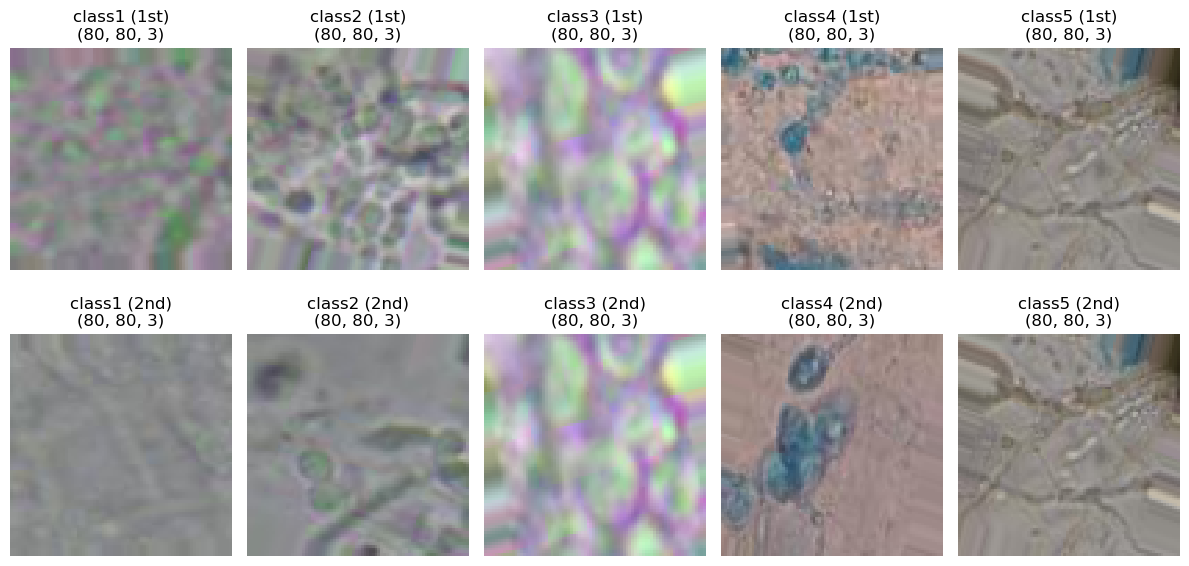

In [8]:
# Defining the class names as a list
class_names = ['class1', 'class2', 'class3', 'class4', 'class5']

# Generating the first batch of images and labels from the train generator
x_batch, y_batch = train_generator.next()

# Creating a figure with 10 subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 6), dpi=100)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Creating a dictionary to keep track of the indices of each class in the batch
class_indices = {}
for i in range(len(class_names)):
    class_indices[i] = []

# Adding the index of each image to its corresponding class in the dictionary
for i in range(len(x_batch)):
    class_indices[y_batch[i].argmax()].append(i)

# Plotting two random images from each class
for i in range(len(class_names)):
    row = i // 5
    col = i % 5
    if len(class_indices[i]) > 0:
        idx1 = class_indices[i][np.random.randint(len(class_indices[i]))]
        ax1 = axes[row, col]
        ax1.imshow(x_batch[idx1], interpolation='nearest')
        ax1.set_title(f"{class_names[i]} (1st)\n{str(x_batch[idx1].shape)}")
        ax1.axis('off')

        idx2 = class_indices[i][np.random.randint(len(class_indices[i]))]
        ax2 = axes[row + 1, col]
        ax2.imshow(x_batch[idx2], interpolation='nearest')
        ax2.set_title(f"{class_names[i]} (2nd)\n{str(x_batch[idx2].shape)}")
        ax2.axis('off')

plt.tight_layout()
plt.show()


In [9]:
# Defining the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax'),
])

model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [10]:
# Setting up model checkpoint callback
mc_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
)

In [11]:
# Training the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[mc_callback],
)

Epoch 1/30
160/160 [==============================] - ETA: 0s - loss: 1.1429 - accuracy: 0.5424
Epoch 1: val_loss improved from inf to 1.04233, saving model to best_model.h5
160/160 [==============================] - 25s 148ms/step - loss: 1.1429 - accuracy: 0.5424 - val_loss: 1.0423 - val_accuracy: 0.5742
Epoch 2/30
160/160 [==============================] - ETA: 0s - loss: 0.9937 - accuracy: 0.5997
Epoch 2: val_loss did not improve from 1.04233
160/160 [==============================] - 22s 139ms/step - loss: 0.9937 - accuracy: 0.5997 - val_loss: 1.1573 - val_accuracy: 0.4784
Epoch 3/30
160/160 [==============================] - ETA: 0s - loss: 0.9360 - accuracy: 0.6265
Epoch 3: val_loss did not improve from 1.04233
160/160 [==============================] - 27s 169ms/step - loss: 0.9360 - accuracy: 0.6265 - val_loss: 1.1043 - val_accuracy: 0.5365
Epoch 4/30
160/160 [==============================] - ETA: 0s - loss: 0.9198 - accuracy: 0.6328
Epoch 4: val_loss did not improve from 1.0

In [12]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

86/86 [==============================] - 4s 40ms/step - loss: 0.9099 - accuracy: 0.6296
Test accuracy: 0.6295754313468933


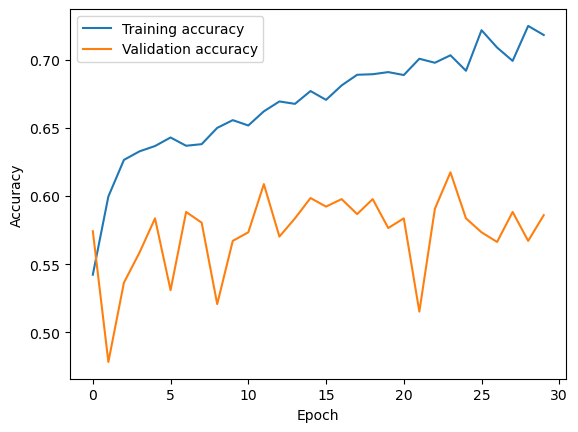

In [13]:
# Plotting the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 29ms/step


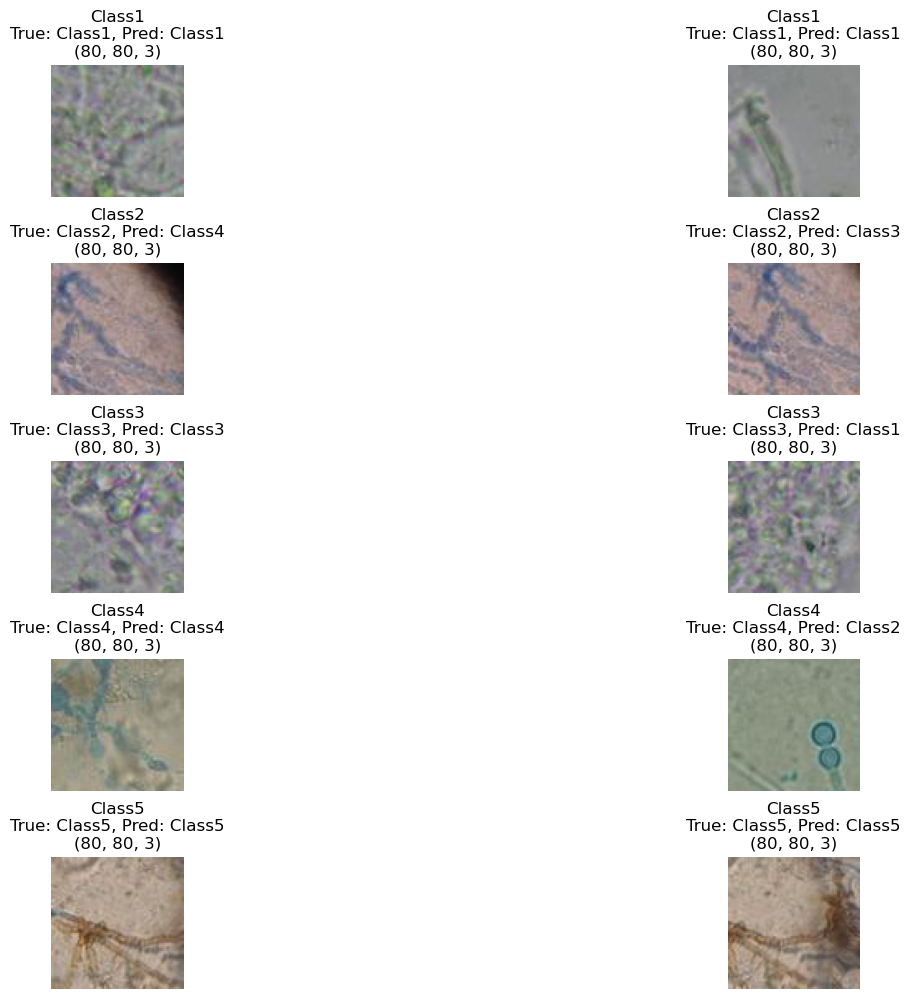

In [14]:
# Displaying sample predictions on the test set using CNN model
class_names = list(train_generator.class_indices.keys())
num_images_per_class = 2

fig, axes = plt.subplots(len(class_names), num_images_per_class, figsize=(16, 12), dpi=100)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(test_dir, class_name)
    class_images = os.listdir(class_dir)[:num_images_per_class]
    for j, image_name in enumerate(class_images):
        image_path = os.path.join(class_dir, image_name)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape[:2])
        image_array = tf.keras.preprocessing.image.img_to_array(image) / 255.
        image_array = np.expand_dims(image_array, axis=0)
        y_true = np.zeros((1, train_generator.num_classes))
        y_true[0, train_generator.class_indices[class_name]] = 1
        y_pred = model.predict(image_array)[0]
        y_true_name = class_name
        y_pred_name = class_names[np.argmax(y_pred)]
        ax = axes[i, j]
        ax.imshow(image_array[0])
        ax.set_title(f"{class_name}\nTrue: {y_true_name}, Pred: {y_pred_name}\n{str(image_array[0].shape)}")
        ax.axis('off')
plt.show()


# Optimizer:
The optimizer used in the code is Adam, which is a popular optimizer in deep learning. Adam stands for Adaptive Moment Estimation, and it is an extension of the stochastic gradient descent optimizer. It uses adaptive learning rates for each parameter, and it also keeps track of the exponentially decaying average of past gradients and squared gradients. These two quantities are used to update the parameters in a way that adapts to the geometry of the loss surface.

# Network Layers:
The CNN model consists of several layers that are stacked on top of each other. The first layer is a Conv2D layer with 32 filters and a kernel size of 3x3, which extracts features from the input image. This is followed by a MaxPooling2D layer with a pool size of 2x2, which reduces the spatial dimensions of the feature maps. The next two layers are similar to the first layer, with 64 and 128 filters, respectively. Finally, the feature maps are flattened and passed through two fully connected layers with 256 and the number of output classes neurons, respectively. The activation function used for all layers except the last one is ReLU, which introduces non-linearity into the model.

# Loss Function:
The loss function used in the code is categorical crossentropy, which is commonly used for multi-class classification problems. It measures the difference between the predicted class probabilities and the true class probabilities. The goal of the optimizer is to minimize this loss function during training.

# Conclusion
Overall, this CNN model architecture is a common and effective approach for image classification tasks. By stacking several convolutional and pooling layers, the model learns to extract useful features from the input images. The fully connected layers at the end of the network use these features to make a prediction about the input image's class. The Adam optimizer helps the model learn the optimal set of parameters, and the categorical crossentropy loss function provides feedback to the optimizer about how well the model is doing at the task of multi-class classification.